<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Manual/blob/main/student_performance_multiple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-performance-multiple-linear-regression


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')
print(df)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

## Preprocessing

In [5]:
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [6]:
df.dtypes

,0
Hours Studied,int64
Previous Scores,int64
Extracurricular Activities,object
Sleep Hours,int64
Sample Question Papers Practiced,int64
Performance Index,float64


In [7]:
# Convert Extracurricular Activities to float. In turn, numpy array will convert all features to float as well
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1.0, 'No': 0.0})

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"First 5 of X: {X[:5]}")
print(f"First 5 of y: {y[:5]}")

First 5 of X: [[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 [ 5. 52.  1.  5.  2.]
 [ 7. 75.  0.  8.  5.]]
First 5 of y: [91. 65. 45. 36. 66.]


In [8]:
def zscore_normalization(x):
  mean = np.mean(x, axis=0)
  sigma = np.std(x, axis=0)

  x = (x - mean) / sigma

  return x

In [9]:
X_norm = zscore_normalization(X)
print(f"First 5 X_norm: {X_norm[0:5, :]}")

First 5 X_norm: [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 [ 0.00274218 -1.00596317  1.01045465 -0.90259446 -0.90098215]
 [ 0.77518771  0.32027498 -0.98965352  0.86650484  0.1453332 ]]


In [10]:
X_train = X_norm[:8000]
y_train = y[:8000]

print(f"First 5 of X_train: {X_train[:5, :]}")
print(f"Shape of X_train: {X_train.shape}")
print(f"First 5 of y_train: {y_train[0:5]}")

First 5 of X_train: [[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 [ 0.00274218 -1.00596317  1.01045465 -0.90259446 -0.90098215]
 [ 0.77518771  0.32027498 -0.98965352  0.86650484  0.1453332 ]]
Shape of X_train: (8000, 5)
First 5 of y_train: [91. 65. 45. 36. 66.]


In [11]:
X_test = X_norm[8000:10000]
y_test = y[8000:10000]

print(f"First 5 of X_test: {X_test[:5, :]}")
print(f"Shape of X_test: {X_test.shape}")
print(f"First 5 of y_test: {y_test[0:5]}")

First 5 of X_test: [[-1.15592611 -1.12128822 -0.98965352 -1.49229423 -1.24975394]
 [ 0.00274218 -1.23661328  1.01045465  0.86650484 -1.24975394]
 [-0.38348058  0.43560004  1.01045465  0.86650484  0.49410499]
 [ 0.00274218  0.95456279  1.01045465 -0.3128947  -0.20343858]
 [ 1.16141048  0.7815752   1.01045465 -1.49229423 -0.90098215]]
Shape of X_test: (2000, 5)
First 5 of y_test: [28. 35. 63. 71. 78.]


## Functions

In [12]:
def compute_model(x, w, b):
  f_wb = np.dot(x, w) + b
  return f_wb

In [13]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  total_cost = 0

  for i in range(m):
    f_wb = np.dot(x[i], w) + b
    total_cost = total_cost + ((f_wb - y[i]) ** 2)

  total_cost = total_cost / (2 * m)
  return total_cost

In [14]:
def compute_gradient(x, y, w, b):
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = np.dot(x[i], w) + b - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * x[i, j]
    dj_db = dj_db + err

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [15]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, cost_function, gradient_function):
  J_hist = []
  w = w_init
  b = b_init

  for i in range(num_iter):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    J_hist.append(cost_function(x, y, w, b))

    if i % math.ceil(num_iter/10) == 0:
      print(f"Iteration {i}\t\tcost: {J_hist[i]}")

  return w, b, J_hist

## Finding w and b

In [16]:
w_init = np.array([0.36183645, 0.88784579, 0.76368782, 0.76548199, 0.41740282])
b_init = 0.5

In [17]:
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, 0.1, 1000, compute_cost, compute_gradient)

Iteration 0		cost: 1346.556560682828
Iteration 100		cost: 2.0640282932370853
Iteration 200		cost: 2.064027296492898
Iteration 300		cost: 2.0640272964929043
Iteration 400		cost: 2.0640272964928927
Iteration 500		cost: 2.0640272964928927
Iteration 600		cost: 2.0640272964928927
Iteration 700		cost: 2.0640272964928927
Iteration 800		cost: 2.0640272964928927
Iteration 900		cost: 2.0640272964928927


In [18]:
print(f"w_final: {w_final}")
print(f"b_final: {b_final}")
print(f"With cost: {J_hist[-1]}")

w_final: [ 7.38300069 17.65484839  0.31563615  0.80410232  0.54877537]
b_final: 55.210302016768345
With cost: 2.0640272964928927


## Visualization

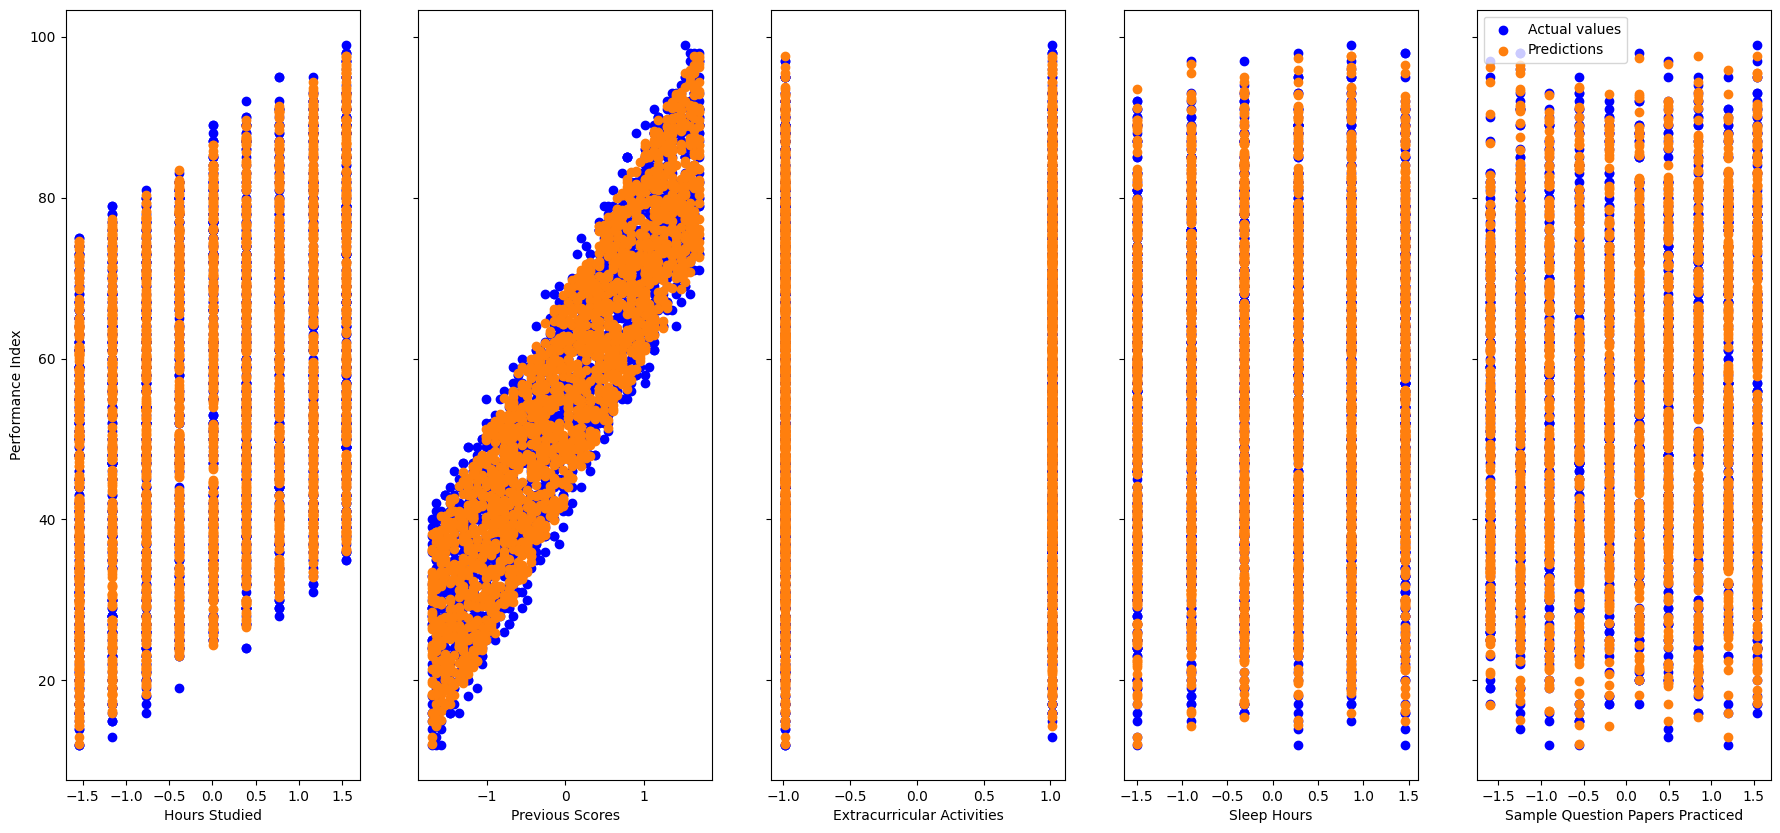

In [19]:
fig, ax = plt.subplots(1, 5, figsize=(22, 10), sharey=True)
features = np.array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])

y_pred = compute_model(X_test, w_final, b_final)

for i in range(len(features)):
  ax[i].scatter(X_test[:, i], y_test, c='b', label='Actual values')
  ax[i].scatter(X_test[:, i], y_pred, c='tab:orange', label='Predictions')
  ax[i].set_xlabel(features[i])

ax[0].set_ylabel('Performance Index')
plt.legend()
plt.show()